# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# EXAMPLE PYTHON CELL

df = pd.read_csv('housing_data.csv')
df

,zip,population,borough,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty
0,11368,112088,QUEENS,76.49,11.60,0.09,7.12,3.73,0.00,0.37,0.60,19.69
1,11385,107796,QUEENS,45.05,6.46,0.03,1.77,45.28,0.00,0.32,1.09,10.68
2,11211,103123,BROOKLYN,24.13,5.53,0.19,3.56,64.24,0.02,0.29,2.05,25.22
3,11208,101313,BROOKLYN,40.58,6.01,0.03,48.89,2.71,0.00,0.76,1.02,25.68
4,10467,101255,BRONX,52.08,5.68,0.35,30.43,9.24,0.02,0.76,1.44,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...
184,10464,4531,BRONX,42.02,5.01,0.00,0.02,52.50,0.00,0.44,0.00,7.11
185,10004,3335,MANHATTAN,3.24,29.06,0.00,3.96,59.28,0.51,1.05,2.91,1.32
186,10006,3092,MANHATTAN,10.83,16.04,0.00,3.20,64.52,0.00,1.68,3.72,3.36
187,10162,1486,MANHATTAN,12.38,4.85,0.00,0.00,79.48,0.00,0.00,3.30,0.00


### Import packages

In [5]:
%%R

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


**Another way to import a package**

Note that sometimes you might see 

```R
library('tidyverse')
```

that also imports a library just the same as `require`

**A note about tidyverse**

The [Tidyverse](https://www.tidyverse.org/packages/) package is actually a bunch of other packages put together. So sometimes, you might see something like

```R
require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')
```

This also achieves the same purpose, but sometimes we just import the pakcages we need instead of the whole tidyverse.




### Read Data


This uses a function in the readr package to read a CSV file. Check out all the other cool things readr can do (like read from an excel file or a google doc)

https://readr.tidyverse.org/

In [6]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip popul…¹ borough pct_h…² pct_a…³ pct_a…⁴ pct_b…⁵ pct_w…⁶ pct_n…⁷ pct_s…⁸
   <dbl>   <dbl> <chr>     <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 11368  112088 QUEENS    76.5    11.6     0.09    7.12    3.73    0       0.37
 2 11385  107796 QUEENS    45.0     6.46    0.03    1.77   45.3     0       0.32
 3 11211  103123 BROOKL…   24.1     5.53    0.19    3.56   64.2     0.02    0.29
 4 11208  101313 BROOKL…   40.6     6.01    0.03   48.9     2.71    0       0.76
 5 10467  101255 BRONX     52.1     5.68    0.35   30.4     9.24    0.02    0.76
 6 11236  100844 BROOKL…    7.66    2.58 

Notice that the assignment operator is `<-` rather than `=`. Actually, both work. Check out this really angry person's guide to R syntax. There are a LOT of punctuation marks in R.

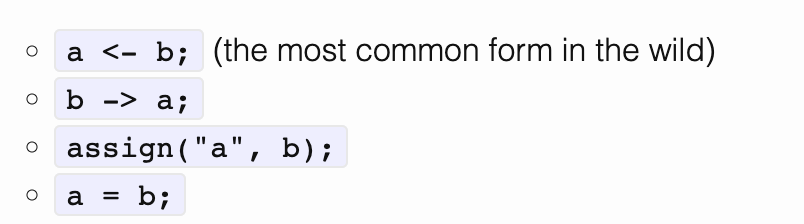

source: http://arrgh.tim-smith.us/syntax.html

# ggplot2 
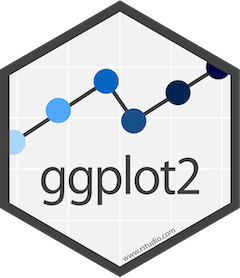


Wahoo! Those are the basics. Now let's plot some **univariate** distributions in ggplot.

### Histogram

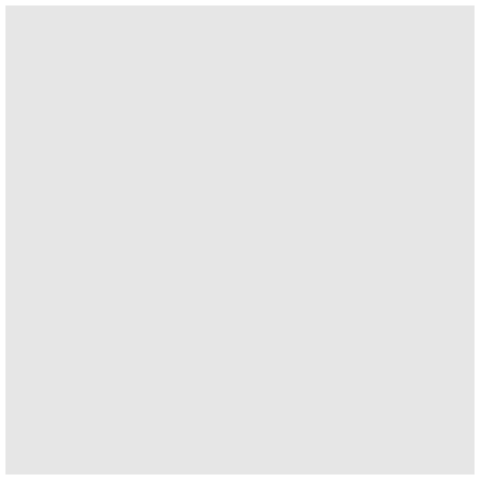

In [7]:
%%R 

# Plot
ggplot(df)


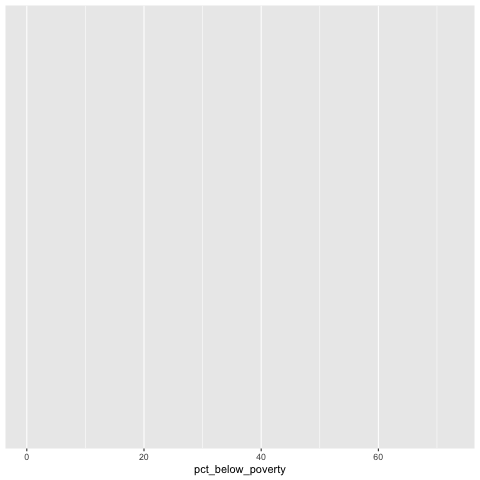

In [8]:
%%R 

# Plot + 
# Aesthetics
ggplot(df) +
    aes(x=pct_below_poverty) 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


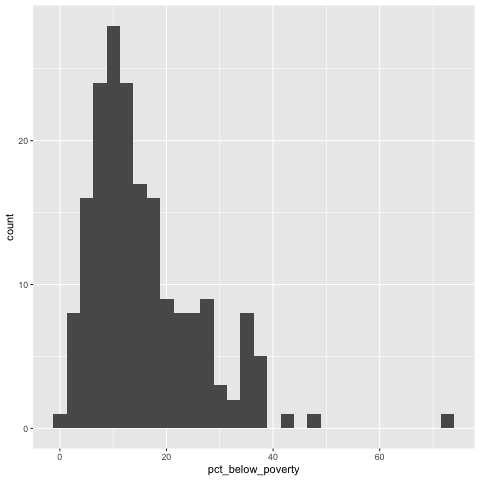

In [9]:
%%R 

# Plot +
# Aesthetics + 
# Geom
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


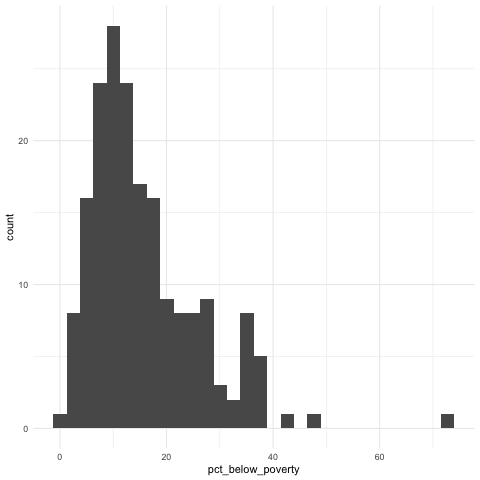

In [10]:
%%R 

# Plot +
# Aesthetics + 
# Geom + 
# Theme
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() + 
    theme_minimal()


**👉 Try It**

Here is an example of a histogram (above), and the documentation for geom_histogram (link below). Read the documentation and adjust the bin sizes (there are two ways to do this)

https://ggplot2.tidyverse.org/reference/geom_histogram.html

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


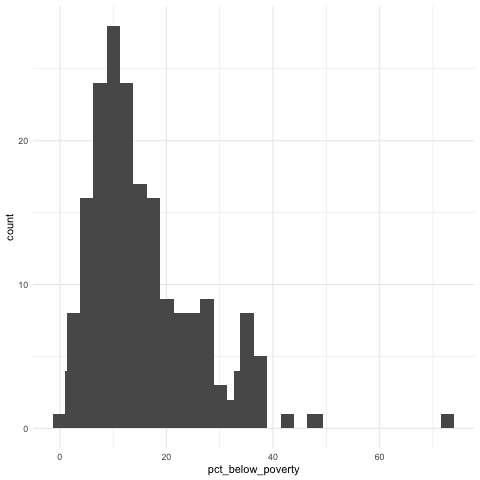

In [11]:
%%R

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() + 
    theme_minimal() +
    stat_bin(bins=40)
    


### Dotplot

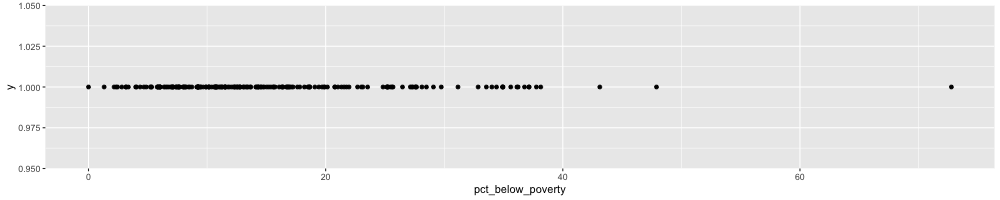

In [12]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point()

**👉 Try It**

Here is an example of a dotplot. It's super hard to read, check out some ggplot documentation and see if you can figure out how to make the dots bigger. Also, let's make them less opaque (more transparant) so that we can see where they overlap.



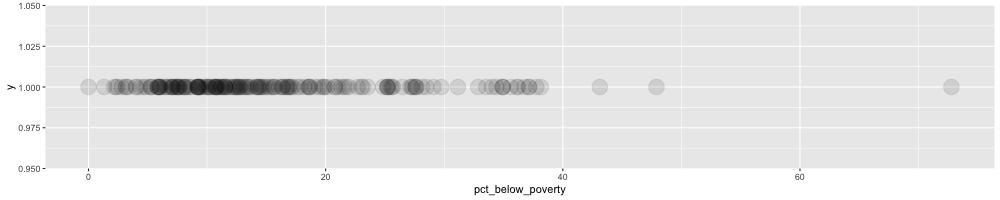

In [13]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point(size=7, alpha = 0.1)


### Dotplot (with jitter)

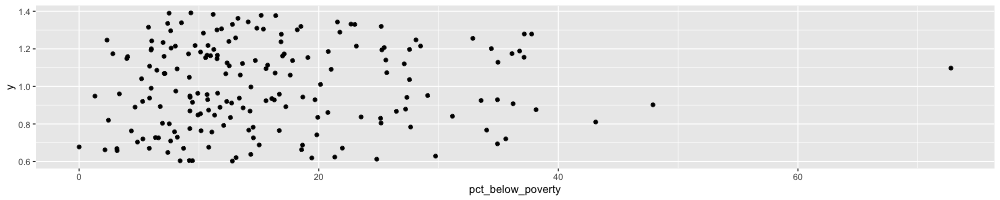

In [14]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter()

**👉 Try It**

Here is an example of a dotplot (with jitter). It's a bit easier to read, but it's hard to make sense of since the y axis is meaningless. Read some documentation and learn how to:

- Add a title and subtitle that helps explain what story this data is telling. Remember, use a narrative title and a descriptive subtitle. The title should tell a story, the subtitle should say what the data is exactly.


**👉 Bonus**
- Remove the y axis labels (and text)
- Improve the text on the X axis label
- Change the default theme, explain why you picked the one you picked.

In [15]:
df

,zip,population,borough,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty
0,11368,112088,QUEENS,76.49,11.60,0.09,7.12,3.73,0.00,0.37,0.60,19.69
1,11385,107796,QUEENS,45.05,6.46,0.03,1.77,45.28,0.00,0.32,1.09,10.68
2,11211,103123,BROOKLYN,24.13,5.53,0.19,3.56,64.24,0.02,0.29,2.05,25.22
3,11208,101313,BROOKLYN,40.58,6.01,0.03,48.89,2.71,0.00,0.76,1.02,25.68
4,10467,101255,BRONX,52.08,5.68,0.35,30.43,9.24,0.02,0.76,1.44,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...
184,10464,4531,BRONX,42.02,5.01,0.00,0.02,52.50,0.00,0.44,0.00,7.11
185,10004,3335,MANHATTAN,3.24,29.06,0.00,3.96,59.28,0.51,1.05,2.91,1.32
186,10006,3092,MANHATTAN,10.83,16.04,0.00,3.20,64.52,0.00,1.68,3.72,3.36
187,10162,1486,MANHATTAN,12.38,4.85,0.00,0.00,79.48,0.00,0.00,3.30,0.00


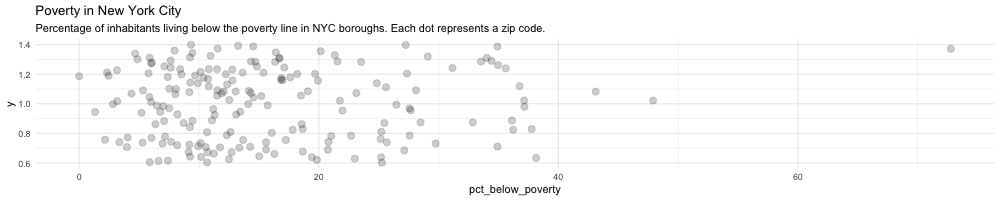

In [16]:
%%R -w 1000 -h 200


ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter(size=3, alpha = 0.2) +
    labs(title = "Poverty in New York City",
    subtitle = "Percentage of inhabitants living below the poverty line in NYC boroughs. Each dot represents a zip code.") +
    theme_minimal()

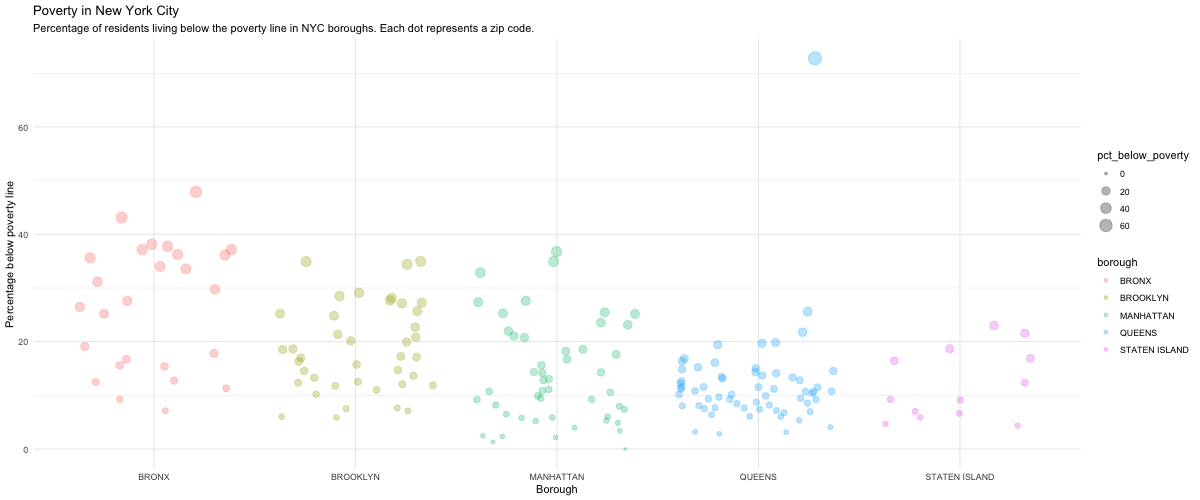

In [17]:
%%R -w 1200 -h 500


ggplot(df) + 
    aes(x=borough, y=pct_below_poverty, size = pct_below_poverty, color = borough) +
    geom_jitter(alpha = 0.3) +
    labs(x='Borough',
        y='Percentage below poverty line',
        title = "Poverty in New York City",
        subtitle = "Percentage of residents living below the poverty line in NYC boroughs. Each dot represents a zip code.") +
    theme_minimal()

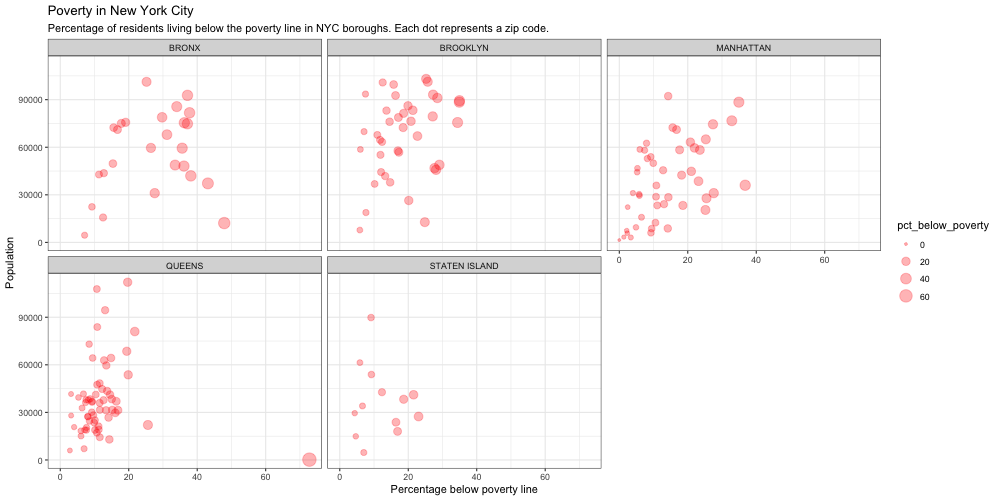

In [143]:
%%R -w 1000 -h 500


ggplot(df) + 
    aes(x=pct_below_poverty, y=population, size = pct_below_poverty) +
    geom_jitter(alpha = 0.3, color = 'red') +
    facet_wrap(~borough) +
    labs(x='Percentage below poverty line',
        y='Population',
        title = "Poverty in New York City",
        subtitle = "Percentage of residents living below the poverty line in NYC boroughs. Each dot represents a zip code.") +
    theme_bw()

I think facet wrap looks better because it is visually easier for me to see the plot by borough instead of a single graph. It also helps to compare percentage below poverty with population. I used theme_bw because it adds a frame around each graph. Without the frame, the outlier in Queens which is so close to the Staten Island graph looked as if it is a part of the Staten Island graph. 

### Density Plot

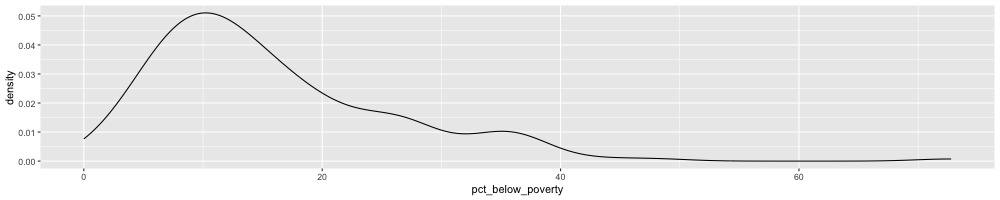

In [19]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


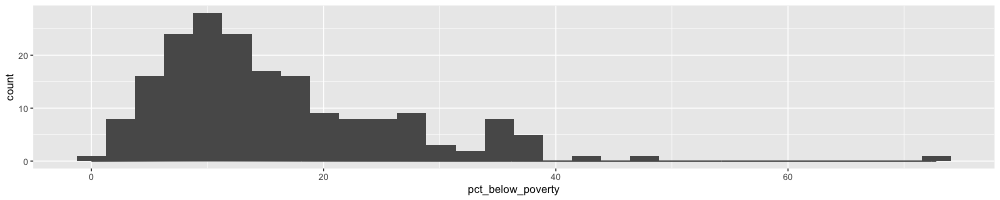

In [146]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() 

> Density Plot is the continuous and smoothed version of the Histogram estimated from the data. It is estimated through Kernel Density Estimation.

Source: https://www.geeksforgeeks.org/histograms-and-density-plots-in-python/


👉 Try It

This one is entirely theoretical. Google around and then take your best shot at answering the following questions:

1) When might you want to use a density plot versus a histogram?

> They both help to visualize data for a numeric or continuous variable. But histograms are better for visualizing outliers. In the case of density plot, the distribution becomes sort of stright-ish line if the skew is large. In the density plot above, the tiny bump in the end of the line can be missed. 

If we're working with very large data, perhaps the density curve is a better option. Historgram might get too noisy and a smooth curve is better to look at. 

I think I will use histograms for smaller datasets. There will be a lot of gaps if we use a density curve since it is a smooth plot. The steps in historgrams give perspective on the difference in the range. 

We can also make multiple density curves in one chart.

2) What is Kernel Density Estimation and how does it work?
    
> Okay most explanations are too mathematical for me. I can spend more time but it's slightly overwhelming. I'm leaving this one to learn it in class in simple English. 

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



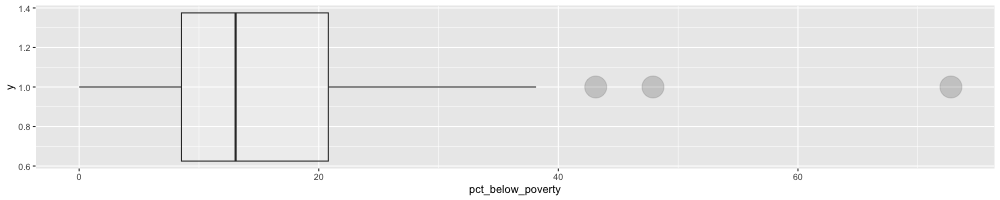

In [76]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10) 

Box and whisker plots aren't super easy to read. We don't always use them in reader-facing visualizations, but you'll find them a lot in scientific papers. Box and whisker plots help draw attention to outliers in relation to the median and interquartile range of the data. 

##### Interpreting a Boxplot
![](boxplot-image.png)
> **Not all boxplots are created equal!**
>
>"Not all boxplots are created equal. There are many different ways in which quantiles can be defined. For example, some will compute a quantile as (i−0.5)/n
 where i
 is the nth element of the batch of data and n
 is the total number of elements in that batch. This is the method implemented by Bill Cleveland and we will refer to this method as Cleveland’s quantile method. This also happens to be the method implemented by the base’s boxplot function which explains the different boxplot output compared to ggplot_boxplot in our working example:


source: https://mgimond.github.io/ES218/Week05a.html

**👉 Try It**

Our box and whisker plot is showing three outliers with very high poverty rates. See if you can:
- figure out how to annotate those so that we know which zipcodes they are
- add a title and subtitle explaining to the reader what they're looking at

**👉 Bonus**
- Can you also annotate which borough the outliers are in?

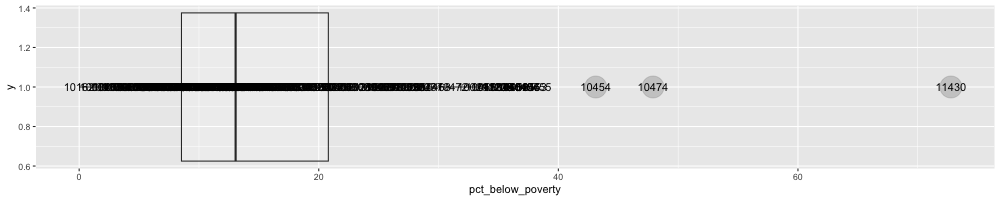

In [141]:
%%R -w 1000 -h 200


ggplot(df) + 
    aes(x=pct_below_poverty, y=1, label=zip) +
    geom_boxplot(alpha=.2,outlier.size=10) +
    geom_text()

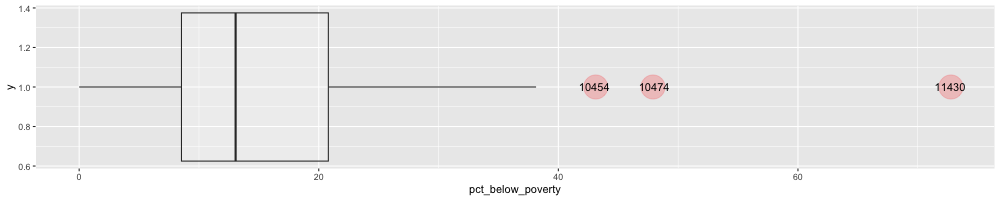

In [139]:
%%R -w 1000 -h 200


ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=11, outlier.color="red") +
    annotate("text", x=43, y=1.0, label="10454", color="black") +
    annotate("text", x=48, y=1.0, label="10474", color="black") +
    annotate("text", x=72.7, y=1.0, label="11430", color="black") 

I wanted to find out if we can find the pincodes + annotate together so I asked ChatGPT. Took me quite some time to understand what it did. So useful!!

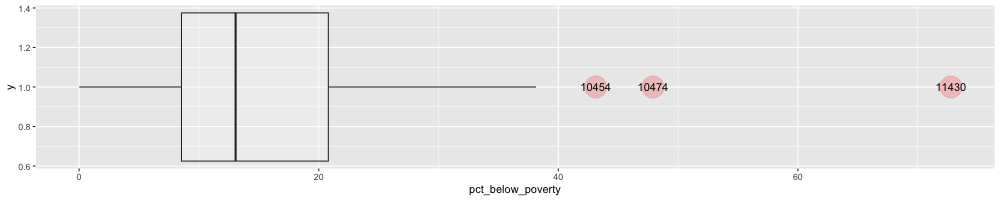

In [ ]:
%%R -w 1000 -h 200

ggplot(df) + 
  aes(x=pct_below_poverty, y=1) +
  geom_boxplot(alpha=.2, outlier.size=10, outlier.color="red") +
  geom_text(aes(x=pct_below_poverty, y=1, label=ifelse(pct_below_poverty %in% boxplot.stats(df$pct_below_poverty)$out, zip, NA)))


### Violin Plot

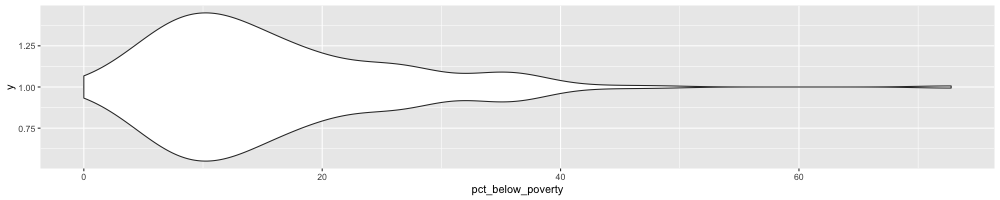

In [ ]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin() 


**👉 Try It**

Violin plots are great in that they help the reader to see nuances in the density a bit better than the box and whisker plot. However, they can be hard to interpret. Showing the dots in/on the violin plot can help.

See if you can find a way to plot the dots in or on the violin plot to help the reader better understand what they're looking it.

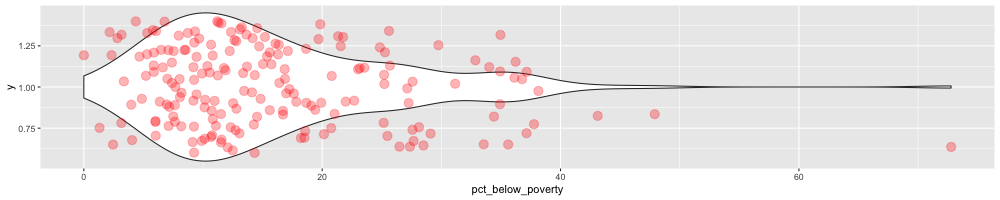

In [121]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin() +
    geom_jitter(size = 4, alpha = 0.3, color = 'red')

The dots help better understand the violin plot. Compared to the boxplot, violin shows the distribution better - like we can see the density and the fact that the data is heavily skewed. The dots put this in perspective. The violin plot is stretched out because of the three outliers and it is really fat around 7% to 16% since most zip codes have 7% to 16% of the population below the poverty line. 

### Beeswarm 
(this requires installing a package)

https://github.com/eclarke/ggbeeswarm

**👉 Try It (Bonus!)**

Install the package above and show the density as a beeswarm rather than just a jitter.


In [54]:
%%R

library(ggbeeswarm)


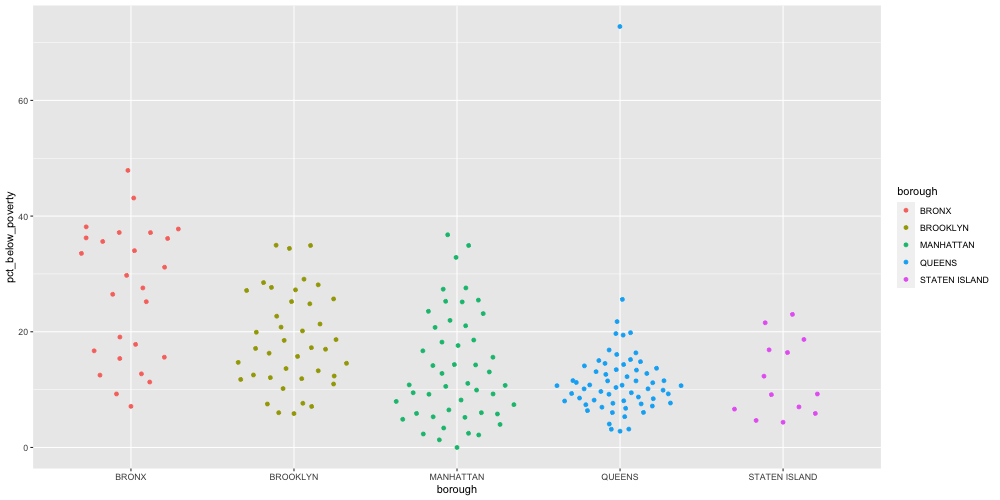

In [137]:
%%R -w 1000 -h 500

ggplot(df) + 
    aes(x=borough, y=pct_below_poverty, color=borough) +
    geom_quasirandom() 
